In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [5]:
seed_df = pd.read_csv('../data/seed_data.csv',index_col=0)

/Users/anotherjonlee/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (56,57,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
seed_df

,participantId,win,item0,item1,item2,item3,item4,item5,item6,kills,...,playerScore3,playerScore4,playerScore5,playerScore6,playerScore7,playerScore8,playerScore9,highestAchievedSeasonTier,role,lane
0,1,True,3800,3748,3193,3065,3742,3071,3340,17,...,0,0,0,0,0,0,0,UNRANKED,SOLO,TOP
1,2,True,3026,3072,3031,3085,3087,3046,3363,24,...,0,0,0,0,0,0,0,GOLD,DUO_CARRY,BOTTOM
2,3,True,3092,3020,2045,3151,3116,3135,3364,8,...,0,0,0,0,0,0,0,SILVER,DUO_SUPPORT,BOTTOM
3,4,True,3026,1400,3117,3071,3065,3742,3364,7,...,0,0,0,0,0,0,0,GOLD,NONE,JUNGLE
4,5,True,3089,3157,3165,3020,3135,3102,3364,10,...,0,0,0,0,0,0,0,SILVER,SOLO,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,False,3030,3050,3076,1056,3020,3145,3363,5,...,0,0,0,0,0,0,0,SILVER,SOLO,MIDDLE
9996,7,False,3096,3504,3222,3024,3009,3082,3340,0,...,0,0,0,0,0,0,0,SILVER,DUO_SUPPORT,BOTTOM
9997,8,False,3078,3110,1001,3075,0,0,3340,6,...,0,0,0,0,0,0,0,BRONZE,SOLO,TOP
9998,9,False,3147,2031,1408,1037,3134,1028,3340,3,...,0,0,0,0,0,0,0,SILVER,NONE,JUNGLE


In [4]:
seed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       10000 non-null  int64 
 1   participantId                    10000 non-null  int64 
 2   win                              10000 non-null  bool  
 3   item0                            10000 non-null  int64 
 4   item1                            10000 non-null  int64 
 5   item2                            10000 non-null  int64 
 6   item3                            10000 non-null  int64 
 7   item4                            10000 non-null  int64 
 8   item5                            10000 non-null  int64 
 9   item6                            10000 non-null  int64 
 10  kills                            10000 non-null  int64 
 11  deaths                           10000 non-null  int64 
 12  assists                          

In [7]:
seed_df.describe()

,participantId,item0,item1,item2,item3,item4,item5,item6,kills,deaths,...,playerScore0,playerScore1,playerScore2,playerScore3,playerScore4,playerScore5,playerScore6,playerScore7,playerScore8,playerScore9
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,5.500000,2395.375800,2768.560900,2699.195500,2598.375600,2180.981100,1460.122100,3338.817300,5.736000,5.760600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872425,958.320404,781.504245,892.444292,1002.155863,1248.311385,1347.742964,167.522891,4.588705,3.250837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.000000,1401.000000,3006.000000,3006.000000,3001.000000,1036.000000,0.000000,3340.000000,2.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5.500000,3031.000000,3077.000000,3067.000000,3065.000000,3031.000000,1038.000000,3340.000000,5.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8.000000,3139.000000,3152.000000,3117.000000,3111.000000,3102.000000,3053.000000,3363.000000,8.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,10.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3513.000000,31.000000,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
seed_df.isna().sum().sort_values(ascending=False)

firstInhibitorAssist               780
firstInhibitorKill                 780
firstTowerKill                     290
firstTowerAssist                   290
firstBloodAssist                   130
                                  ... 
neutralMinionsKilledEnemyJungle      0
totalTimeCrowdControlDealt           0
champLevel                           0
visionWardsBoughtInGame              0
participantId                        0
Length: 78, dtype: int64

In [22]:
players_tiers = seed_df.groupby('highestAchievedSeasonTier').sum()[['participantId']]

In [27]:
players_tiers

,participantId
highestAchievedSeasonTier,
BRONZE,7496
DIAMOND,1648
GOLD,12260
MASTER,58
PLATINUM,6220
SILVER,16466
UNRANKED,10852


In [28]:
players_tiers['participantId'].argsort()

highestAchievedSeasonTier
BRONZE      3
DIAMOND     1
GOLD        4
MASTER      0
PLATINUM    6
SILVER      2
UNRANKED    5
Name: participantId, dtype: int64

In [38]:
players_tiers['participantId'].count()

7

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

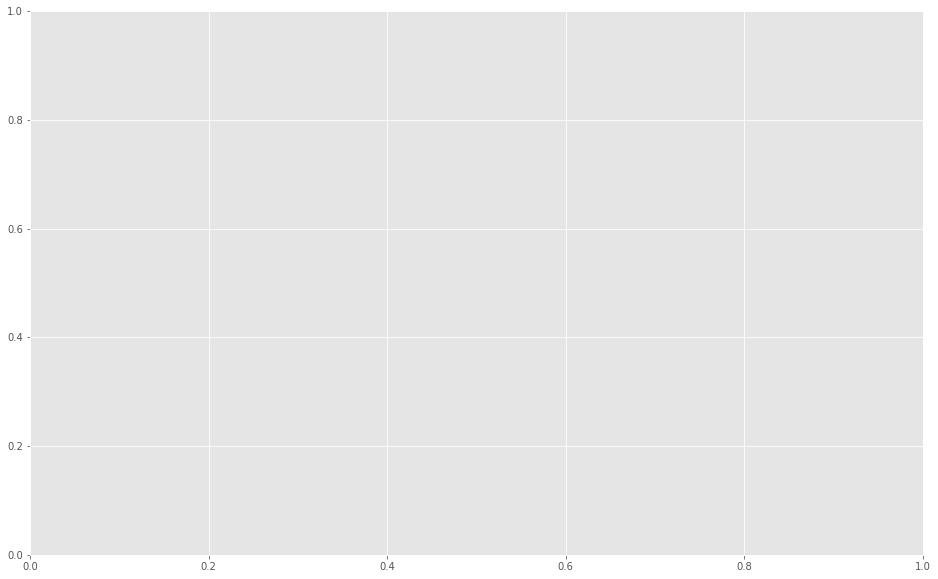

In [36]:
fig,ax = plt.subplots(figsize=(16,10))

ax = sns.barplot(x = players_tiers.index,
                 y=players_tiers.count,
                data=players_tiers)
ax.set(ylabel='Number of players')
plt.show()

In [17]:
seed_df.groupby('role').sum()[['participantId']]

,participantId
role,
DUO,2033
DUO_CARRY,10113
DUO_SUPPORT,10153
NONE,11251
SOLO,21450


In [18]:
seed_df.groupby('lane').sum()[['participantId']]

,participantId
lane,
BOTTOM,21876
JUNGLE,11151
MIDDLE,11003
TOP,10970


In [34]:
seed_df.groupby('lane').mean()[['win','kills','deaths','assists','largestKillingSpree',
       'largestMultiKill', 'killingSprees', 'longestTimeSpentLiving',
       'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills',
       'unrealKills', 'totalDamageDealt', 'magicDamageDealt',
       'physicalDamageDealt', 'trueDamageDealt', 'largestCriticalStrike',
       'totalDamageDealtToChampions', 'magicDamageDealtToChampions',
       'physicalDamageDealtToChampions', 'trueDamageDealtToChampions',
       'totalHeal', 'totalUnitsHealed', 'damageSelfMitigated',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'visionScore',
       'timeCCingOthers', 'totalDamageTaken', 'magicalDamageTaken',
       'physicalDamageTaken', 'trueDamageTaken', 'goldEarned', 'goldSpent',
       'turretKills', 'inhibitorKills', 'totalMinionsKilled',
       'neutralMinionsKilled', 'neutralMinionsKilledTeamJungle',
       'neutralMinionsKilledEnemyJungle', 'totalTimeCrowdControlDealt',
       'champLevel', 'visionWardsBoughtInGame', 'sightWardsBoughtInGame',
       'wardsPlaced', 'wardsKilled']]

,win,kills,deaths,assists,largestKillingSpree,largestMultiKill,killingSprees,longestTimeSpentLiving,doubleKills,tripleKills,...,totalMinionsKilled,neutralMinionsKilled,neutralMinionsKilledTeamJungle,neutralMinionsKilledEnemyJungle,totalTimeCrowdControlDealt,champLevel,visionWardsBoughtInGame,sightWardsBoughtInGame,wardsPlaced,wardsKilled
lane,,,,,,,,,,,,,,,,,,,,,
BOTTOM,0.501886,4.723158,5.572542,10.355544,2.132260,1.241639,1.065124,658.232336,0.525270,0.082223,...,106.518984,5.301232,2.790294,0.793814,310.302741,13.729947,1.262007,0.0,14.020367,2.218004
JUNGLE,0.503219,6.104507,5.948985,8.421991,2.810302,1.359584,1.435364,657.207528,0.505696,0.065874,...,52.231798,72.917781,46.522041,4.732046,635.996038,14.388806,0.881625,0.0,10.476474,1.699356
MIDDLE,0.493300,7.167246,5.838710,7.036228,3.272953,1.460546,1.669479,631.674938,0.670968,0.085856,...,160.978164,6.471464,3.796526,1.333499,485.870968,14.555831,0.878412,0.0,9.882878,1.266005
TOP,0.499749,5.937154,5.866264,6.552539,2.769734,1.353947,1.385621,628.872298,0.529412,0.067873,...,171.056310,6.747612,2.675214,1.418301,521.461036,14.982906,0.719960,0.0,9.474108,1.148316


In [33]:
seed_df.columns

Index(['participantId', 'win', 'item0', 'item1', 'item2', 'item3', 'item4',
       'item5', 'item6', 'kills', 'deaths', 'assists', 'largestKillingSpree',
       'largestMultiKill', 'killingSprees', 'longestTimeSpentLiving',
       'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills',
       'unrealKills', 'totalDamageDealt', 'magicDamageDealt',
       'physicalDamageDealt', 'trueDamageDealt', 'largestCriticalStrike',
       'totalDamageDealtToChampions', 'magicDamageDealtToChampions',
       'physicalDamageDealtToChampions', 'trueDamageDealtToChampions',
       'totalHeal', 'totalUnitsHealed', 'damageSelfMitigated',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'visionScore',
       'timeCCingOthers', 'totalDamageTaken', 'magicalDamageTaken',
       'physicalDamageTaken', 'trueDamageTaken', 'goldEarned', 'goldSpent',
       'turretKills', 'inhibitorKills', 'totalMinionsKilled',
       'neutralMinionsKilled', 'neutralMinionsKilledTeamJungle',
       'neutralMinionsKille

In [ ]:
fig,ax = plt.subplots(figsize(16,10))

def plot_lines(ax,x,y):
    ax = sns.plot()
